### Importing Our Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Our Data

In [2]:
df = pd.read_csv('2023_PL_standings.csv')
df.head(5)

,rank,points,goalsDiff,team_id,team.name,matches_played,wins,draws,losses,goals_for,...,home_draw,home_lose,home_goals_for,home_goals_against,away,away_wins,away_draw,away_lose,away_goals_for,away_goals_against
0,1,89,61,50,Manchester City,38,28,5,5,94,...,1,1,60,17,19,11,4,4,34,16
1,2,84,45,42,Arsenal,38,26,6,6,88,...,3,2,53,25,19,12,3,4,35,18
2,3,75,15,33,Manchester United,38,23,6,9,58,...,3,1,36,10,19,8,3,8,22,33
3,4,71,35,34,Newcastle,38,19,14,5,68,...,6,2,36,14,19,8,8,3,32,19
4,5,67,28,40,Liverpool,38,19,10,9,75,...,5,1,46,17,19,6,5,8,29,30


### Rename columns 

In [3]:
df.rename(columns={'goalsDiff':'goals_diff', 'team.name': 'team_name'}, inplace=True)

### Total Wins by team 

In [4]:
total_wins_per_team = df.groupby('team_name')['wins'].sum()
total_wins_per_team.sort_values(ascending=False)


team_name
Manchester City      28
Arsenal              26
Manchester United    23
Liverpool            19
Newcastle            19
Tottenham            18
Aston Villa          18
Brighton             18
Fulham               15
Brentford            15
Bournemouth          11
Chelsea              11
Wolves               11
West Ham             11
Crystal Palace       11
Leicester             9
Nottingham Forest     9
Everton               8
Leeds                 7
Southampton           6
Name: wins, dtype: int64

### Pie Chart Function

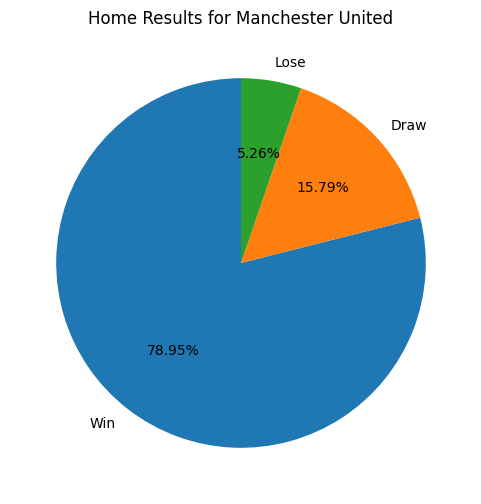

In [5]:
def pie_figure_stats(df, team_name, stat='all'):
    """Pie chart of team results (home, away, all)"""
    team_df = df[df['team_name'] == team_name]
    if team_df.empty:
        print(f"No data found for {team_name}")
        return

    numeric_cols_dict = {
        'home': ['home_wins', 'home_draw', 'home_lose'],
        'away': ['away_wins', 'away_draw', 'away_lose'],
        'all': ['wins', 'draw', 'lose']
    }

    stat_key = stat.lower()
    numeric_cols = numeric_cols_dict.get(stat_key, numeric_cols_dict['all'])

    missing_cols = [col for col in numeric_cols if col not in team_df.columns]
    if missing_cols:
        print(f"Missing columns in DataFrame: {missing_cols}")
        return

    stats_values = team_df[numeric_cols].sum()
    if stats_values.sum() == 0:
        print(f"No matches recorded for {team_name} in {stat} stats.")
        return
    labels = ['win', 'draw', 'lose']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    plt.figure(figsize=(6,6))
    plt.pie(stats_values, labels=list(map(str.capitalize, labels)), autopct='%.2f%%', startangle=90, colors=colors)
    plt.title(f"{stat.capitalize()} Results for {team_name}")
    plt.show()

pie_figure_stats(df, 'Manchester United', 'home')

### Highest Goal Difference 


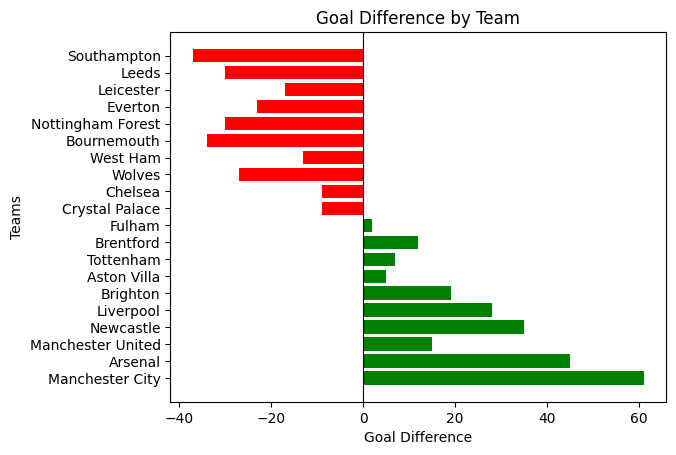

In [6]:
df['goals_diff'] = df['goals_for'] - df['goals_against']
plt.barh(df["team_name"], df["goals_diff"], color=df["goals_diff"].apply(lambda x: "green" if x >= 0 else "red"))
plt.xlabel("Goal Difference")
plt.ylabel("Teams")
plt.title("Goal Difference by Team")
plt.axvline(0, color="black", linewidth=0.8)
plt.show()


### Points per match


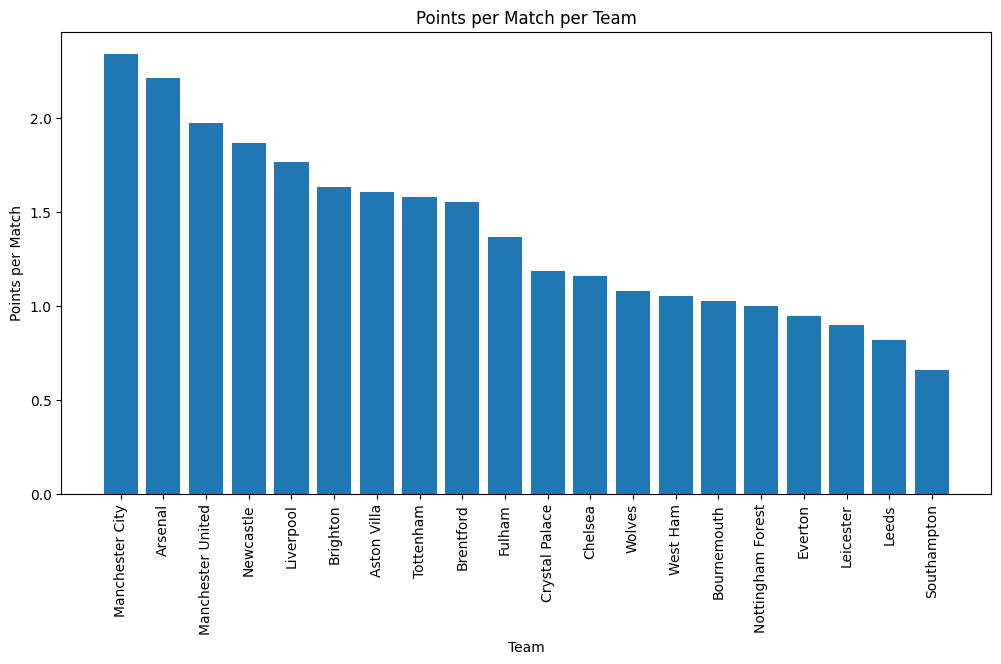

In [7]:
matches_played = 38
df['points_per_match'] = round(df['points'] / matches_played, 3)
df[['team_name','points_per_match']].sort_values(by='points_per_match', ascending=False)

plt.figure(figsize=(12,6))
plt.bar(df['team_name'], df['points_per_match'])
plt.xticks(rotation=90) 
plt.xlabel("Team")
plt.ylabel("Points per Match")
plt.title("Points per Match per Team")
plt.show()

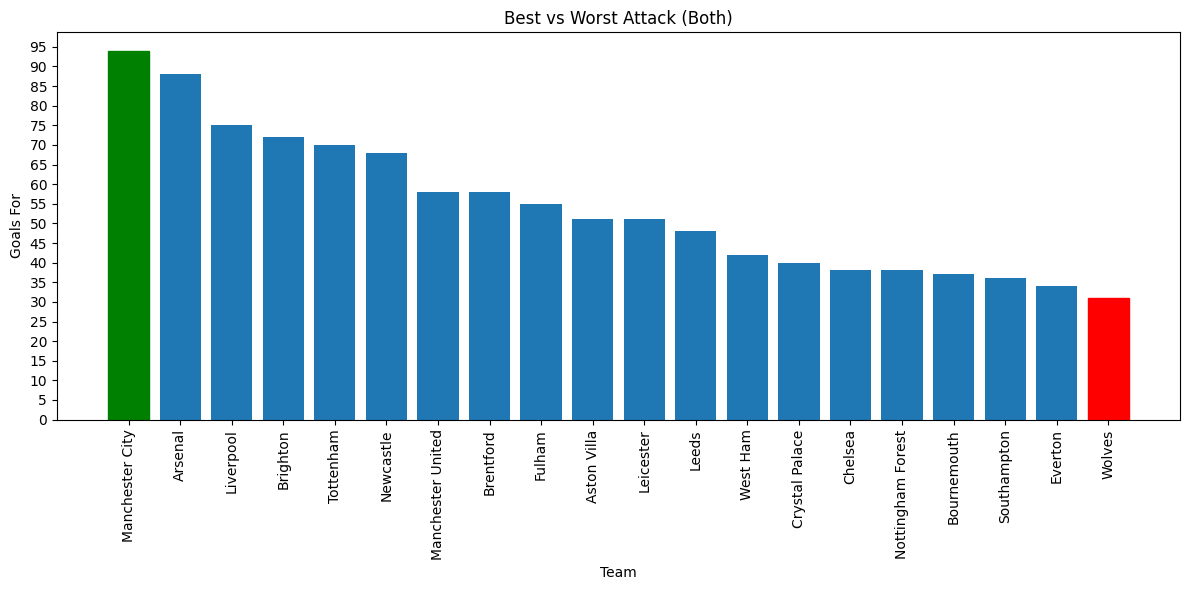

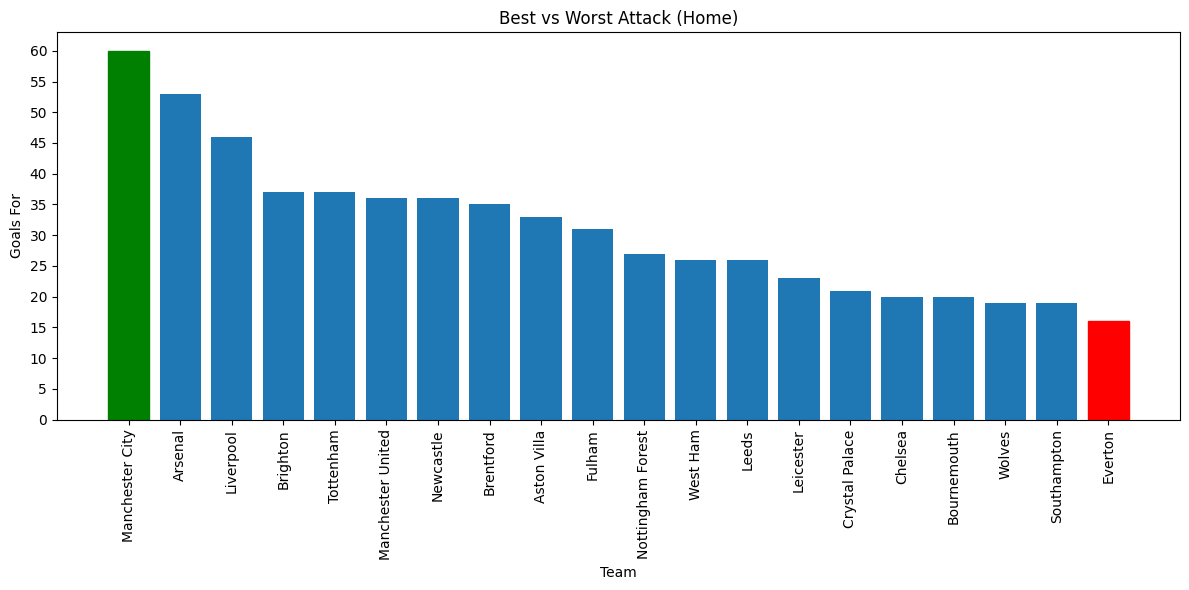

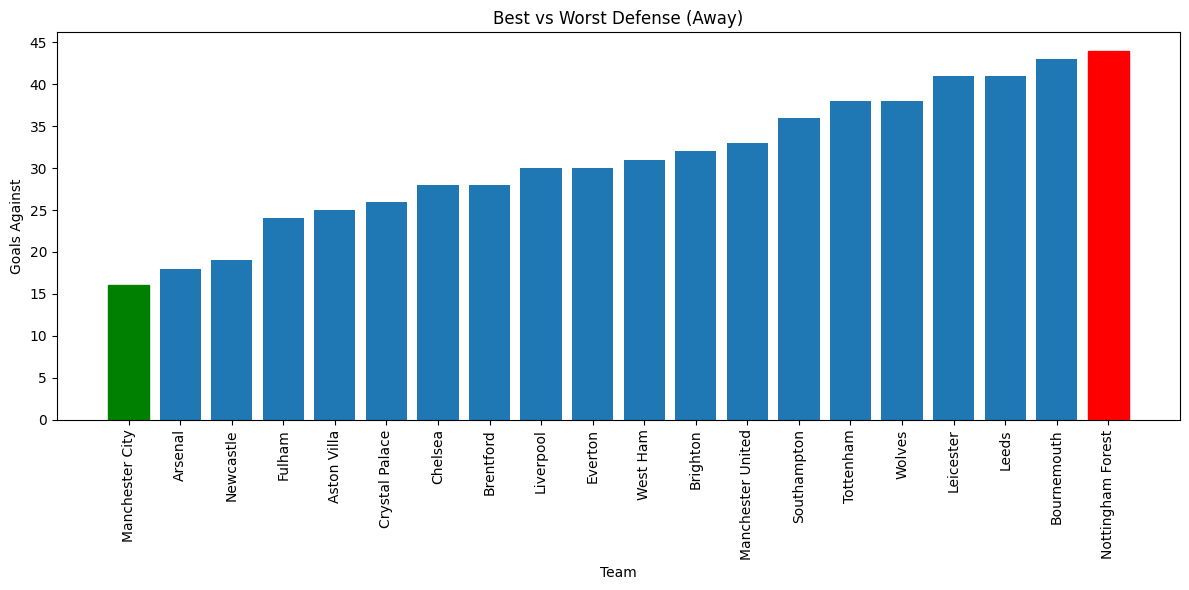

In [8]:
### Best vs Worst Plot Function
def plot_best_worst(df, column, title, ylabel, ascending=False, best="max", side="both"):
    # adjust column name based on side
    col = column
    if side == "home":
        col = f"home_{column}"
    elif side == "away":
        col = f"away_{column}"

    if col not in df.columns:
        print(f"Column {col} not found in DataFrame")
        return

    df_sorted = df.sort_values(col, ascending=ascending)

    plt.figure(figsize=(12,6))
    bars = plt.bar(df_sorted['team_name'], df_sorted[col])

    best_idx = df_sorted[col].idxmax() if best=="max" else df_sorted[col].idxmin()
    worst_idx = df_sorted[col].idxmin() if best=="max" else df_sorted[col].idxmax()

    bars[df_sorted.index.get_loc(best_idx)].set_color('green')
    bars[df_sorted.index.get_loc(worst_idx)].set_color('red')

    plt.xticks(rotation=90)
    plt.xlabel("Team")
    plt.ylabel(ylabel)
    plt.title(f"{title} ({side.capitalize()})")
    plt.yticks(np.arange(0, df_sorted[col].max() + 5, 5))
    plt.tight_layout()
    plt.show()

# usage examples
plot_best_worst(df, 'goals_for', 'Best vs Worst Attack', 'Goals For', ascending=False, best="max")
plot_best_worst(df, 'goals_for', 'Best vs Worst Attack', 'Goals For', ascending=False, best="max", side="home")
plot_best_worst(df, 'goals_against', 'Best vs Worst Defense', 'Goals Against', ascending=True, best="min", side="away")


### Home vs Away Team Plot


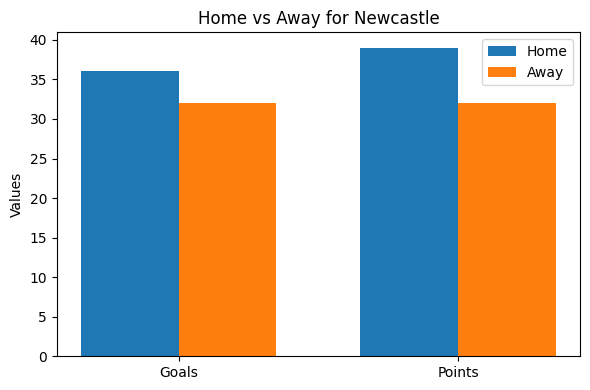

In [9]:
def plot_home_away_team(df, team_name):
    team_df = df[df['team_name'] == team_name]
    if team_df.empty:
        print(f"No data found for {team_name}")
        return
    team = team_df.iloc[0]

    categories = ['Goals', 'Points']
    home = [team['home_goals_for'], team['home_wins']*3 + team['home_draw']]
    away = [team['away_goals_for'], team['away_wins']*3 + team['away_draw']]

    x = range(len(categories))
    width = 0.35

    plt.figure(figsize=(6,4))
    plt.bar([i - width/2 for i in x], home, width, label='Home')
    plt.bar([i + width/2 for i in x], away, width, label='Away')

    plt.xticks(x, categories)
    plt.ylabel("Values")
    plt.title(f"Home vs Away for {team_name}")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_home_away_team(df, "Newcastle")


### Big Gap between home_wins and away_wins

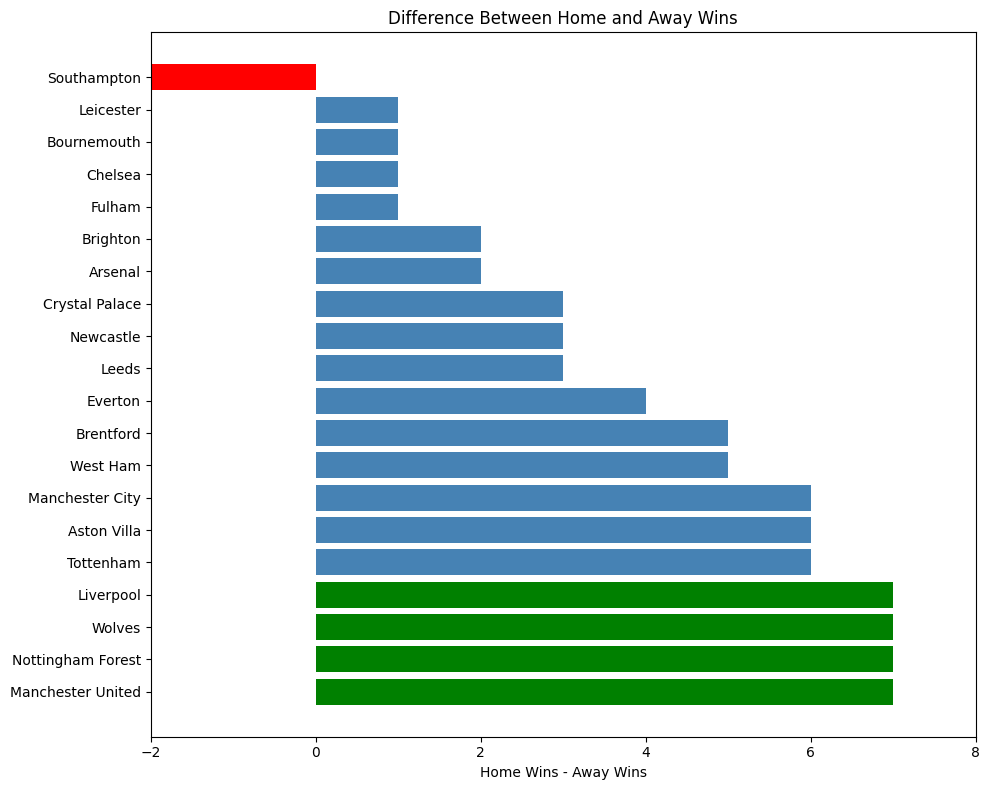

In [10]:
df['big_gap'] = df['home_wins'] - df['away_wins']
df_sorted = df[['team_name','big_gap']].sort_values(by='big_gap', ascending=False)

max_val = df_sorted['big_gap'].max()

colors = np.where(
    df_sorted['big_gap'] < 0, "red",
    np.where(df_sorted['big_gap'] == max_val, "green", "steelblue")
)

plt.figure(figsize=(10,8))
plt.barh(df_sorted['team_name'], df_sorted['big_gap'], color=colors)
plt.xlabel("Home Wins - Away Wins")
plt.title("Difference Between Home and Away Wins")
plt.xlim(-2, max_val + 1)
plt.tight_layout()
plt.show()